In [109]:
import csv 
import random 
import datetime

#creamos las columnas de las tablas con la información 
productos= ['Producto 1', 'Producto 2', 'Producto 3']
paises= ['País 1', 'País 2', 'País 3']
ventas= []

for i in range(1000):
    #se crea diccionario con la clave fecha con el valor de fecha 
    venta= {}
    venta['Fecha']= datetime.date(2023, random.randint(1,12),
                                  random.randint(1,28))
    #seleccionamos la clave producto 
    venta['Producto']= random.choice(productos)
    venta['País']= random.choice(paises)
    venta['Ventas']= random.randint(100, 10000)
    ventas.append(venta)
    


with open('datos_ventas_prueba.csv', mode= 'w', newline= '') as archivo_csv:
    nombres_columnas= ['Fecha', 'Producto', 'País', 'Ventas'] 
    escritor_csv= csv.DictWriter(archivo_csv, fieldnames= nombres_columnas)
    escritor_csv.writeheader()

    for venta in ventas:
        escritor_csv.writerow(venta)


In [110]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

class DatosVentas:
    def __init__(self, ruta_archivo):
        self.datos= pd.read_csv(ruta_archivo, sep=',')

    def procesar_datos(self):
        self.datos['Fecha']= pd.to_datetime(self.datos['Fecha'])
        self.datos['Mes']= self.datos['Fecha'].dt.month
        self.datos['Año']= self.datos['Fecha'].dt.year
    
    def obtener_datos(self):
        return self.datos
    

In [111]:
a= DatosVentas('datos_ventas_prueba.csv')

a.obtener_datos()
a.procesar_datos()
a.obtener_datos()


,Fecha,Producto,País,Ventas,Mes,Año
0,2023-12-08,Producto 1,País 2,9145,12,2023
1,2023-09-23,Producto 2,País 2,9894,9,2023
2,2023-09-01,Producto 1,País 1,2141,9,2023
3,2023-10-06,Producto 2,País 1,969,10,2023
4,2023-02-18,Producto 3,País 1,1932,2,2023
...,...,...,...,...,...,...
995,2023-10-22,Producto 3,País 3,7792,10,2023
996,2023-02-05,Producto 3,País 3,2022,2,2023
997,2023-01-14,Producto 1,País 2,2803,1,2023
998,2023-11-11,Producto 1,País 1,8632,11,2023


In [112]:
class AnalizadorVentas:
    def __init__(self, datos_ventas):
        self.objeto = datos_ventas.datos

    def obtener_ventas_totales(self):
        return self.objeto['Ventas'].sum()
    
    def obtener_ventas_promedio_mes(self):
        return self.objeto.groupby(['Mes', 'Año'])['Ventas'].mean().reset_index() 
    
    def obtener_producto_mas_vendidos(self, numero_filas):
        return self.objeto.groupby('País')['Ventas'].sum().nlargest(numero_filas).reset_index() 


In [113]:
analizador_v= AnalizadorVentas(a)

analizador_v.obtener_ventas_promedio_mes()

analizador_v.obtener_producto_mas_vendidos(2)


,País,Ventas
0,País 3,1725130
1,País 1,1705586


In [127]:
class VisualizadorVentas:
    def __init__(self,datos_ventas):
        self.objeto = datos_ventas.datos
    
    def graficar_ventas_totales(self):
        self.objeto.groupby(["Mes"])["Ventas"].sum().reset_index().plot(
            x="Fecha", y= "Ventas"
        )

    def graficar_ventas_totales2(self):
        datos_por_fecha= self.objeto.groupby(["Fecha"])["Ventas"].sum().reset_index(
        ).reset_index()

        plt.plot(datos_por_fecha.Fecha, datos_por_fecha.Ventas, color='GREY', 
                 marker='*',linestyle='--') 
        
        plt.title('Ventas totales por fecha')
        plt.xlabel('Fecha')
        plt.ylabel('Ventas')
        plt.show()

    def graficar_ventas_promedio_por_mes(self):
        #agrupa los campos año y mes y los une con la media de ventas 
        ventas_por_mes = self.objeto.groupby(['Año', 
        'Mes'])['Ventas'].mean().reset_index()

        #ponemos en x mes y y en ventas
        plt.plot(ventas_por_mes['Mes'], ventas_por_mes['Ventas'])
        
        plt.title('Ventas promedio por mes')
        
        plt.xlabel('Mes')
        
        plt.ylabel('Ventas')
        
        plt.show()


    def graficar_productos_mas_vendidos(self, n):
        #agrupamos, sumamos las ventas y guardamos los datos de producto 
        # ventas de mayor a menor (nlargest -segun la fila que ponga usuario-)
        productos_mas_vendidos = self.objeto.groupby('Producto')[
            'Ventas'].sum().nlargest(n).reset_index()
        
        #bar: gráfico de barras eje x y y
        plt.bar(productos_mas_vendidos['Producto'], productos_mas_vendidos[
            'Ventas'])
        
        #muestra el parametro de n
        plt.title('Los {} productos más vendidos'.format(n))
        plt.xlabel('Producto')
        plt.ylabel('Ventas')
        plt.show()

    def graficar_mapa_ventas(self):
        #Agrupa los datos de ventas por país y suma las ventas para cada país.
        datos_por_pais = self.objeto.groupby('País')['Ventas'
        ].sum().reset_index()

        #	    País	Ventas     <--datos_por_pais
        #    0	País 1	1617287
        #    1	País 2	1627373
        #    2	País 3	1640510
        
        #crea la matriz de esta manera, accede al dataframe y accede a 
        #la columna ventas
        data = np.array([datos_por_pais.Ventas]) 

        #La función plt.subplots() crea una figura y uno o varios ejes. 
        #fig y ax: se utiliza para establecer propiedades generales de la 
        # figura (tamaño, título, leyenda, no o varios ejes dentro de la figura)
        fig, ax = plt.subplots() #esta funcion devuelve dos objetos
        
        #que crea el mapa de calor utilizando los valores de la matriz 
        # data y el mapa de colores "summer".
        im = ax.imshow(data, cmap='summer')

        #data.shape[0] retorna el número de filas 
        # y data.shape[1] retorna el número de columnas de data
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                #escribe en el grafico la informacion de data
                #j,i: posicions/ data[i,j]: el contenido de data
                text = ax.text(j, i, data[i, j],
                            ha="center", va="center", color="black")
        
        # Añadir la barra de color
        #im: objeto de la imagen 
        #ax: ejes se dibujará la barra de colores
        cbar = ax.figure.colorbar(im, ax=ax)

        # Ajustar la etiqueta de los países en el eje x
        #se establece en un rango que va desde 0 hasta la 
        # longitud de la segunda dimensión de la matriz data.
        ax.set_xticks(np.arange(data.shape[1]))
        #escribe la informacion de la columna pais
        ax.set_xticklabels(['País 1', 'País 2', 'País 3'])

        #quita la informacion de y
        ax.set_yticks([])


        # Rotar las etiquetas del eje x
        plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
                rotation_mode="anchor")

        # Ajustar los márgenes del gráfico
        plt.tight_layout()

        plt.show()

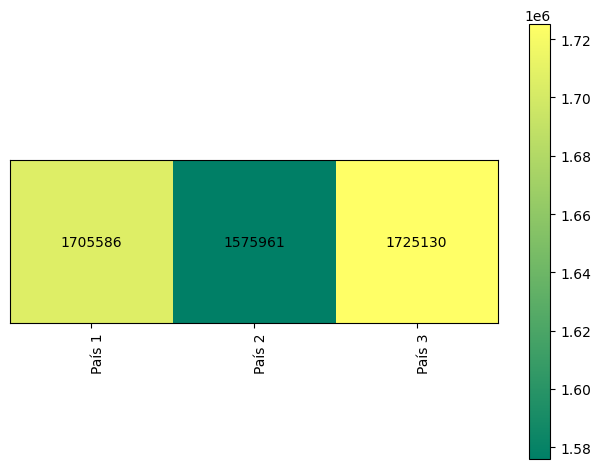

In [128]:
b= VisualizadorVentas(a)

b.graficar_mapa_ventas()